In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,BatchNormalization,Dropout,Dense,Input,Flatten
from tensorflow.keras.models import Model

In [3]:
img_size=48
batch_size=64
# train data generator
datagen_train = tf.keras.preprocessing.image.ImageDataGenerator()
train_generator = datagen_train.flow_from_directory('archive/train/',
                                                    target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

#test data generator
datagen_validation = tf.keras.preprocessing.image.ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory('archive/test/',
                                                    target_size=(img_size,img_size),color_mode='grayscale',batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


*** defining model ***

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x= Conv2D(filters= filters, kernel_size=kernel_size,padding='same')(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size=(2,2))(x)
    x= Dropout(0.25)(x)
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x= Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Dropout(0.25)(x)
    return x

In [6]:
def model_fer(input_shape):
    inputs= Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    op = Dense(7,activation='softmax')(dense_1)
    model = Model(inputs= [inputs], outputs=[op])
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    return model

In [7]:
m = model_fer((48,48,1))

In [8]:
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [9]:
epochs=15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
checkpoint= tf.keras.callbacks.ModelCheckpoint('model_weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks= [checkpoint]


In [12]:
callbacks

## train the model

In [10]:
m.layers

In [11]:
history= m.fit(x= train_generator,
               steps_per_epoch= steps_per_epoch,
               epochs=epochs,
               validation_data= validation_generator,
               validation_steps= validation_steps,
               callbacks= callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6408 - accuracy: 0.3790
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 935s 2s/step - loss: 1.6408 - accuracy: 0.3790 - val_loss: 1.5560 - val_accuracy: 0.3922
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3453 - accuracy: 0.4942
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 576s 1s/step - loss: 1.3453 - accuracy: 0.4942 - val_loss: 1.4838 - val_accuracy: 0.4347
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1928 - accuracy: 0.5531
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 344s 768ms/step - loss: 1.1928 - accuracy: 0.5531 - val_loss: 1.5226 - val_accuracy: 0.4196
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0577 - accuracy: 0.6088
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 305s

In [13]:
# model evaluation
m.evaluate(validation_generator)

113/113 [==============================] - 27s 239ms/step - loss: 1.9197 - accuracy: 0.5079


[1.9197036027908325, 0.507940948009491]

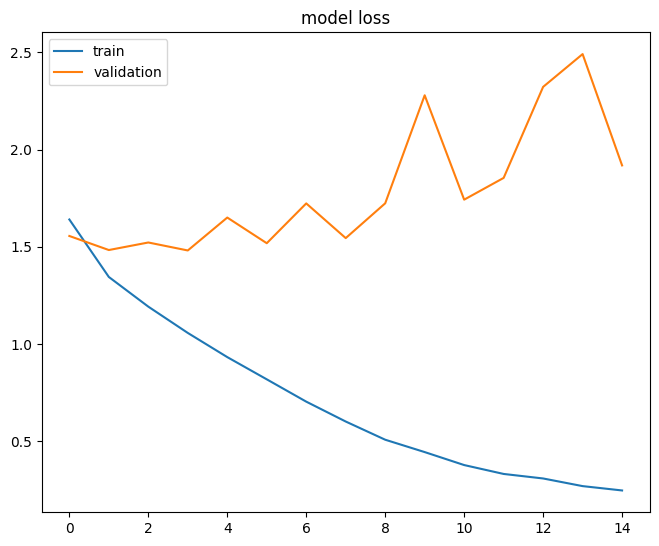

In [20]:
# loss _curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.75)

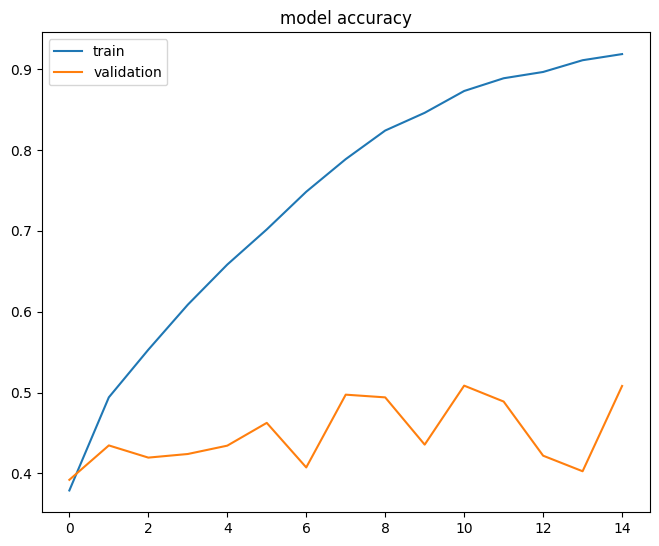

In [22]:
# loss _c
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.75)

In [23]:
# saving model
model_json = m.to_json()
with open('model_a.json','w') as json_file:
    json_file.write(model_json)